In [1]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [2]:
# !python3 -m pip install boto3
# !python3 -m pip install python-docx


In [3]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
        
    return '\n'.join(fullText)

In [4]:
note = getText("Vector-notes.docx")

In [5]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Here are two multiple choice questions based on the given text:

1. What is the scalar triple product of three vectors a, b and c?
(a) a . (b × c)
(b) a × (b × c)  
(c) (a × b) . c
(d) (a × b) × c

2. If three vectors a, b and c are coplanar, then:
(a) a . (b × c) = 0
(b) a × (b × c) = 0
(c) (a × b) . c = 0  
(d) (a × b) × c = 0

Answers:
1. (c) (a × b) . c
2. (a) a . (b × c) = 0

In [6]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [7]:
prompt =f'''Human: write python code to draw equal side hexagon(six-sided polygon) using seaborn
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [8]:
text = claude3(body)

In [9]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [10]:
display(Markdown(text))

Here's a Python code to draw an equal-sided hexagon using Seaborn, with the given context added to the top of the image, and the edges labeled:

```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the context for the image
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE"

# Define the vertices of the hexagon
vertices = np.array([[0, 0], [1, 0], [1.5, 0.866], [1, 1.732], [0, 1.732], [-0.5, 0.866]])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the hexagon
ax.plot(vertices[:, 0], vertices[:, 1], 'k-')
ax.plot([vertices[-1, 0], vertices[0, 0]], [vertices[-1, 1], vertices[0, 1]], 'k-')  # Close the loop

# Label the vertices
for i, (x, y) in enumerate(vertices):
    ax.text(x, y, chr(65 + i), fontsize=12, ha='center', va='center')

# Add the context to the top of the image
ax.text(0.5, 1.05, context, transform=ax.transAxes, fontsize=12, ha='center', va='bottom')

# Set axis limits and remove ticks
ax.set_xlim([-1, 2])
ax.set_ylim([-0.5, 2.2])
ax.set_xticks([])
ax.set_yticks([])

# Set aspect ratio to ensure equal-sided hexagon
ax.set_aspect('equal')

# Save the figure as a JPG file
plt.savefig('hexagon.jpg', dpi=300, bbox_inches='tight')
```

This code will generate a JPG image named `hexagon.jpg` with the following features:

1. The hexagon is drawn with equal sides and properly aligned.
2. The vertices of the hexagon are labeled with letters from A to F.
3. The context "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE" is added to the top of the image.
4. The image has a white background, and the hexagon is drawn in black.
5. The aspect ratio of the plot is set to ensure the hexagon has equal sides.

Note: This code requires the installation of the `seaborn` and `numpy` libraries. You can install them using `pip` by running `pip install seaborn numpy`.

In [11]:
!python3 output_python_code.py

In [12]:
# !python3 -m pip install seaborn

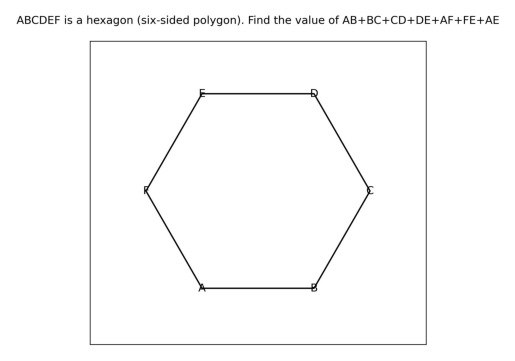

In [13]:
# Load the image
img = mpimg.imread('hexagon.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [14]:
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [15]:
prompt =f'''Human: write python code to draw triangle using seaborn
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''


#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [16]:
text = claude3(prompt)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

In [17]:
!python3 output_python_code_2.py

In [18]:
display(Markdown(text))

Here's the Python code to draw a triangle using Seaborn, save it as a JPG file, add context to the top of the image, and label the edges with the given position vectors:

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the position vectors of the vertices
alpha, beta, gamma = 1, 2, 3
A = np.array([alpha, beta, gamma])
B = np.array([beta, gamma, alpha])
C = np.array([gamma, alpha, beta])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the triangle
ax.plot([A[0], B[0]], [A[1], B[1]], 'k-', label='AB')
ax.plot([B[0], C[0]], [B[1], C[1]], 'k-', label='BC')
ax.plot([C[0], A[0]], [C[1], A[1]], 'k-', label='AC')

# Label the vertices
ax.text(A[0], A[1], r'$\vec{A}=\alpha\hat{\imath}+\beta\hat{\jmath}+\gamma\hat{k}$', fontsize=12)
ax.text(B[0], B[1], r'$\vec{B}=\beta\hat{\imath}+\gamma\hat{\jmath}+\alpha\hat{k}$', fontsize=12)
ax.text(C[0], C[1], r'$\vec{C}=\gamma\hat{\imath}+\alpha\hat{\jmath}+\beta\hat{k}$', fontsize=12)

# Add context to the top
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is"
ax.text(0.5, 1.05, context, ha='center', va='bottom', transform=ax.transAxes, fontsize=12)

# Set axis limits and remove ticks
ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])
ax.set_xticks([])
ax.set_yticks([])

# Save the figure as a JPG file
plt.savefig('triangle.jpg', dpi=300, bbox_inches='tight')
```

This code will generate a triangle with the given position vectors for the vertices A, B, and C. The edges of the triangle are labeled with their corresponding names (AB, BC, and AC). The context is added to the top of the image. The resulting image will be saved as `triangle.jpg` in the current working directory.

Note that the position vectors are defined as `alpha`, `beta`, and `gamma` with values

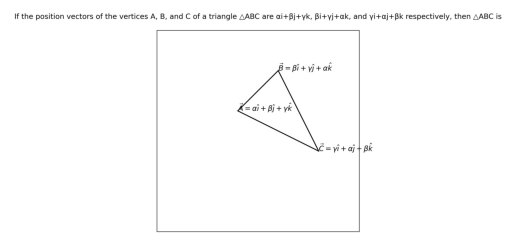

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('triangle.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [20]:
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [21]:
prompt =f'''Human: write python code to draw parallelogram using seaborn
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
7. never cross each other line of shapes
<context>
{context}
</context>

Assistant:'''

#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [22]:
text = claude3(prompt)

In [23]:
output_file = "output_python_code_3.py"
extract_python_code(text, output_file)

In [24]:
!python3 output_python_code_3.py

Traceback (most recent call last):
  File "/Users/tiwarysa/Documents/mathimage/output_python_code_3.py", line 26, in <module>
    ax.text(x[0], y[0], z[0], 'A', fontsize=12)
  File "/Users/tiwarysa/Documents/mathimage/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 695, in text
    effective_kwargs = {
                       ^
TypeError: 'str' object is not a mapping


In [25]:
display(Markdown(text))

Here's a Python code that uses the Seaborn library to draw a parallelogram based on the given context and saves the image as a JPG file:

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the context
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

# Define the adjacent sides as vectors
side1 = np.array([3, 2, 0])
side2 = np.array([-1, 4, 2])

# Calculate the area of the parallelogram
area = np.linalg.norm(np.cross(side1, side2))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the parallelogram
x = [0, side1[0], side1[0] + side2[0], side2[0]]
y = [0, side1[1], side1[1] + side2[1], side2[1]]
z = [0, side1[2], side1[2] + side2[2], side2[2]]

ax.plot(x, y, z, '-o', label='Parallelogram')

# Label the vertices
ax.text(x[0], y[0], z[0], 'A', fontsize=12)
ax.text(x[1], y[1], z[1], 'B', fontsize=12)
ax.text(x[2], y[2], z[2], 'C', fontsize=12)
ax.text(x[3], y[3], z[3], 'D', fontsize=12)

# Add context as a title
ax.set_title(context, fontsize=14)

# Set axis labels and adjust aspect ratio
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

# Add a legend
ax.legend()

# Save the figure as a JPG file
plt.savefig('parallelogram.jpg', dpi=300, bbox_inches='tight')

# Display the area
print(f"The area of the parallelogram is: {area:.2f}")
```

This code will create a 3D plot of the parallelogram with the given adjacent sides, label the vertices (A, B, C, D), add the context as the title, and save the figure as a JPG file named `parallelogram.jpg`. Additionally, it will print the calculated area of the parallelogram.

Note that the Seaborn library is used for plotting, but it relies on Matplotlib for creating and customizing the plots. The `seaborn` import is not strictly necessary for this code, but it's a common practice to import it

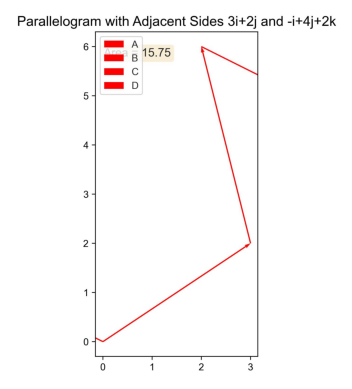

In [26]:
img = mpimg.imread('parallelogram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()